# Sentiment Analysis

Sentiment Analysis or Opinion Mining, is a sub-field of Natural Language Processing (NLP) that tries to identify and extract opinions within a given text. The aim of sentiment analysis is to gauge the attitude, sentiments, and emotions of a customer based on the computational treatment of subjectivity in a text. The two common methods for sentiment classification are lexicon/rule-based and machine learning-based.

## TextBlob

TextBlob is a Python library for processing textual data. It provides a simple API for diving into common
natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis,
classification, translation, and more.

The textblob sentiments module contains two sentiment analysis implementations - PatternAnalyzer
(lexicon-based) and NaiveBayesAnalyzer (an NLTK classifier pre-trained on a movie reviews corpus).

The default implementation is PatternAnalyzer. It returns two values: subjectivity score and sentiment polarity

You can override the default implementation by passing another implementation into a TextBlob’s constructor. The NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg).

In [1]:
from textblob import TextBlob
TextBlob("I flew from LA to SFO").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [2]:
TextBlob("I am excited to binge watch a tv show today").sentiment

Sentiment(polarity=0.375, subjectivity=0.75)

In [3]:
#Handles emoticons
TextBlob("I am excited to binge watch a tv show today :)").sentiment

Sentiment(polarity=0.4375, subjectivity=0.875)

In [4]:
#The pattern analyser in textblob is not very good at handling negations
TextBlob("The popcorn did not taste good").sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [5]:
# Using Naive Bayes instead of Pattern Analyzer
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob("The popcorn did not taste good", analyzer=NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='neg', p_pos=0.46931692651161244, p_neg=0.530683073488388)

## AFINN 

AFINN is a lexicon of English words rated for valence with an integer between minus five (negative) and plus five (positive). The words have been manually labeled by Finn Årup Nielsen in 2009-2011.

In [8]:
from afinn import Afinn
afinn = Afinn()
afinn.score('I am excited to plan my trip to Orlando')

3.0

In [9]:
#Captures neutral or objective statements in most cases
afinn.score('I went to Disneyland')

0.0

In [10]:
# Can handle emoticons when activated
afinn = Afinn(emoticons = True)
afinn.score('I went to Disneyland :)')



2.0

In [11]:
#Accounts for slangs like "gr8"
afinn.score('Had a gr8 experience at the theme park')

3.0

In [12]:
#Handles negation
afinn.score('The food at the themepark was not good')

-2.0

## VADER Sentiment Analyser

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.

VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

The VADER algorithm outputs sentiment scores to 4 classes of sentiments

neg: Negative probability
neu: Neutral probability
pos: Positive probability
compound: normalized aggregated sentiment score between - 1 and +1)

In [14]:
#import the library for VADER
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#initialize vader
VADER_analyser = SentimentIntensityAnalyzer()

sentiment_score = VADER_analyser.polarity_scores("The flight was clean and good")
print(sentiment_score)

{'neg': 0.0, 'neu': 0.417, 'pos': 0.583, 'compound': 0.6808}


In [15]:
#VADER handles emphasis in setences 
sentiment_score = VADER_analyser.polarity_scores("The flight was CLEAN and GOOD")
print(sentiment_score)

{'neg': 0.0, 'neu': 0.361, 'pos': 0.639, 'compound': 0.7944}


In [16]:
#VADER example 2
sentiment_score = VADER_analyser.polarity_scores("We had a bad experience")
print(sentiment_score)

{'neg': 0.467, 'neu': 0.533, 'pos': 0.0, 'compound': -0.5423}


In [17]:
#VADER handles emojis
sentiment_score = VADER_analyser.polarity_scores("We had a bad experience :(")
print(sentiment_score)

{'neg': 0.615, 'neu': 0.385, 'pos': 0.0, 'compound': -0.7506}


In [18]:
#VADER handles objective sentences
sentiment_score = VADER_analyser.polarity_scores("We took a flight from LA to NY")
print(sentiment_score)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [19]:
#VADER handles negation in sentences
sentiment_score = VADER_analyser.polarity_scores("The flight attendants were not friendly")
print(sentiment_score['compound'])

-0.3875


##  Sentiments can be misclassified

While TextBlob, AFINN and VADER are found to perform well on an average compared to many other lexicon-based methods, they do NOT provide 100% accurate sentiment classification. Given the same sentence, the sentiment classification by each of these methods can be different. In addition, it is also possible for the three methods to misclassify a given sentence. Nevertheless, these methods produce highly accurate results on an average when applied to large text corpus, especially on social media text.

In [20]:
#Example 1: Different Classification Produced by Different Methods
print(TextBlob("The rides were fun, but I did not like the long wait time").sentiment)
print(afinn.score('The rides were fun, but I did not like the long wait time'))
print(VADER_analyser.polarity_scores('The rides were fun, but I did not like the long wait time'))

Sentiment(polarity=0.125, subjectivity=0.30000000000000004)
6.0
{'neg': 0.169, 'neu': 0.696, 'pos': 0.136, 'compound': -0.1318}


In [22]:
#Example 2: Potential missclassifcation by all 3 methods
print(TextBlob("Even though the rides were fun, I did not like the long wait time").sentiment)
print(afinn.score('Even though  rides were fun, I did not like the long wait time'))
print(VADER_analyser.polarity_scores('Even though  rides were fun, I did not like the long wait time'))

Sentiment(polarity=0.125, subjectivity=0.30000000000000004)
6.0
{'neg': 0.129, 'neu': 0.67, 'pos': 0.201, 'compound': 0.2937}


## Sentiment Analysis for Large Datasets

### Import the data

In [2]:
import numpy as np

#Load the dataset containing the sentences
import pandas as pd #Needed to load excel files

# Load first sheet of excel file to a data frame called df


# Import required packages
import pandas as pd
import datetime
import numpy as np


UA_TweetData = pd.ExcelFile('UA_Tweets_Small.xlsx').parse('Sheet1')


print(UA_TweetData.head())

                                           UA Tweets            DateTime  \
0                                     @united thanks 2015-02-24 11:42:48   
1  @united Thanks for taking care of that MR!! Ha... 2015-02-24 11:42:41   
2  @united still no refund or word via DM. Please... 2015-02-24 11:39:45   
3  @united Delayed due to lack of crew and now de... 2015-02-24 11:39:25   
4  @united thanks -- we filled it out. How's our ... 2015-02-24 11:38:15   

  Time_created  
0     11:42:48  
1     11:42:41  
2     11:39:45  
3     11:39:25  
4     11:38:15  


### Remove Twitter Handles

In [3]:
#Remove duplicates, if needed
#UA_TweetData.drop_duplicates(subset='UA Tweets',inplace=True)

UA_TweetData['UA Tweets'] = UA_TweetData['UA Tweets'].str.replace('(@[a-z0-9]+)\w+',' ')
print(UA_TweetData.head())

<ipython-input-3-1b697dc2774d>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  UA_TweetData['UA Tweets'] = UA_TweetData['UA Tweets'].str.replace('(@[a-z0-9]+)\w+',' ')


                                           UA Tweets            DateTime  \
0                                             thanks 2015-02-24 11:42:48   
1    Thanks for taking care of that MR!! Happy cu... 2015-02-24 11:42:41   
2    still no refund or word via DM. Please resol... 2015-02-24 11:39:45   
3    Delayed due to lack of crew and now delayed ... 2015-02-24 11:39:25   
4    thanks -- we filled it out. How's our luck w... 2015-02-24 11:38:15   

  Time_created  
0     11:42:48  
1     11:42:41  
2     11:39:45  
3     11:39:25  
4     11:38:15  


### Convert Tweets to Python Lists

In [4]:
#Extract column containg reviews and store it to Review Text as a list
Tweets = UA_TweetData['UA Tweets'].tolist()

print(Tweets[0:20])



['  thanks', '  Thanks for taking care of that MR!! Happy customer.', "  still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.", "  Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united", "  thanks -- we filled it out. How's our luck with this? Is it common?", '  Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :)', '  even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?', '  you think you boarded flight AU1066 too early? I think so.', "  I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.", '  Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.', '  flying gla-mco in a few weeks. How long do we have to be at ai

### Pre-Process Tweets

#### Example of preprocessor package

In [5]:
#for first time  pip install tweet-preprocessor
import preprocessor as p

#The 'clean' function will remove URLs, Hashtags, Mentions, Reserved words (RT, FAV), Emojis, Smileys
print(p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))

#The 'tokenize' function will replace HASHTAG EMOJI URLs as text within $ sign
print(p.tokenize('Preprocessor is #awesome :) https://github.com/s/preprocessor'))

#The 'set_options' function will allow you to customize the aspects to be removed
p.set_options(p.OPT.URL, p.OPT.EMOJI)
print(p.clean('Preprocessor is #awesome 👍 https://github.com/s/preprocessor'))

Preprocessor is
Preprocessor is $HASHTAG$ $SMILEY$ $URL$
Preprocessor is #awesome


#Options available for customizing pre-processing
Remove URL =>	p.OPT.URL <br> 
Remove Mention  =>	p.OPT.MENTION <br> 
Remove Hashtag  =>	p.OPT.HASHTAG <br> 
Remove Reserved Words  =>	p.OPT.RESERVED <br> 
Remove Emoji  =>	p.OPT.EMOJI <br> 
Remove Smiley  =>	p.OPT.SMILEY <br> 
Remove Number  =>	p.OPT.NUMBER<br> 

#### Pre-processing UA Tweets

In [6]:
for tweet in Tweets:
    print(tweet)

  thanks
  Thanks for taking care of that MR!! Happy customer.
  still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.
  Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united
  thanks -- we filled it out. How's our luck with this? Is it common?
  Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :)
  even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?
  you think you boarded flight AU1066 too early? I think so.
  I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.
  Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.
  flying gla-mco in a few weeks. How long do we have to be at airport for before departure for b

In [7]:
cleaned_tweet = []
for tweet in Tweets:
    cleaned_tweet.append(p.clean(tweet))

print(cleaned_tweet)

['thanks', 'Thanks for taking care of that MR!! Happy customer.', "still no refund or word via DM. Please resolve this issue as your Cancelled Flightled flight was useless to my assistant's trip.", "Delayed due to lack of crew and now delayed again because there's a long line for deicing... Still need to improve service #united", "thanks -- we filled it out. How's our luck with this? Is it common?", 'Your ERI-ORD express connections are hugely popular .. now if only we could have an ERI-EWR hop! :)', 'even on international flight Glasgow to the U.S.? Then what about orlando to Newark? All 90 mins?', 'you think you boarded flight AU1066 too early? I think so.', "I understand, but it's tough when there is no way to get to the airport w/o serious risk of an accident. It's a steep price.", 'Gate agent hooked me up with alternate flights. If you have a way to PREVENT the constant issues, that would rock.', 'flying gla-mco in a few weeks. How long do we have to be at airport for before depar

### Classify Sentiment on PreProcessed Tweets

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from afinn import Afinn
from textblob import TextBlob

#initialize vader
VADER_analyser = SentimentIntensityAnalyzer()
afinn_analyser = Afinn()




#Create a empty list to store review sentiment score
TB_review_sentiment = []
AFINN_review_sentiment = []
VADER_review_sentiment = []

#For each sentence in the review
for tweet in cleaned_tweet:
    #Cacluate the sentiment score
    TB_sentiment_score = TextBlob(tweet).sentiment.polarity
    AFINN_sentiment_score = afinn_analyser.score(tweet)
    VADER_sentiment_score = VADER_analyser.polarity_scores(tweet)
    
    #Store the compound sentiment score for that sentence
    TB_review_sentiment.append(TB_sentiment_score)
    AFINN_review_sentiment.append(AFINN_sentiment_score)
    VADER_review_sentiment.append(VADER_sentiment_score['compound'])


print("Text Blob Sentiment Scores")
print(TB_review_sentiment)

print("AFINN Sentiment Scores")
print(AFINN_review_sentiment)


print("VADER Sentiment Scores")
print(VADER_review_sentiment)

Text Blob Sentiment Scores
[0.2, 0.55625, -0.5, -0.0875, 0.10000000000000003, 0.3666666666666667, 0.0, 0.1, -0.3611111111111111, 0.0, -0.0625, 0.2, 0.1, 0.0, -0.375, -0.5, -0.12083333333333333, 0.0, 0.5, 0.13636363636363635, 0.0, 0.0, -0.3, 1.0, 0.0, 0.0, 0.8, 0.1, 0.0, -0.041666666666666664, 0.0, 0.5, 0.325, 0.3666666666666667, -0.3, 0.0, 0.0, 0.17083333333333334, -0.125, 0.0, 0.06999999999999999, 0.2857142857142857, 0.0, -0.18181818181818182, 0.0, 0.0, 0.6, 0.2, 0.021590909090909105, -0.39, 0.0, 0.2, 0.0, 0.0, -0.11666666666666672, 0.4, 0.5, -0.3, -0.05, -0.125, 0.0, -0.275, 0.0, 0.0, 0.22222222222222224, 0.0, 0.0, 0.0, 0.0, -0.024999999999999994, 0.0, 0.0, 0.5, 0.04166666666666667, -0.195, 0.21666666666666667, 0.005729166666666667, -0.5859375, 0.0, -0.4, -0.16666666666666666, -0.10714285714285715, -0.20833333333333331, 0.7, 0.13636363636363635, 0.78125, -0.5, 0.0, -0.2, 0.0, -0.15555555555555559, 0.0, 0.5, 0.0, 0.0, 0.0, 0.0, 0.225, 0.0]
AFINN Sentiment Scores
[2.0, 7.0, -1.0, -1.0,

### Calculate Overall Sentiments from Tweet

In [44]:
#Calculating Overall Sentiment Summary for VADER Analyzer

print("The average review sentiment based on VADER Analyzer is: ", 
                        np.mean(VADER_review_sentiment))

print("The median review sentiment based on VADER Analyzer is: ",  
                       np.median(VADER_review_sentiment))

print("The SD of review sentiment based on VADER Analyzer is: ", 
                          np.std(VADER_review_sentiment))


print("The 25th percentile of review sentiment based on VADER Analyzer is: ", 
                    np.percentile(VADER_review_sentiment,25))

print("The 75th percentile of review sentiment based on VADER Analyzer is: ", 
                     np.percentile(VADER_review_sentiment,75))

The average review sentiment based on VADER Analyzer is:  0.12140606060606061
The median review sentiment based on VADER Analyzer is:  0.0
The SD of review sentiment based on VADER Analyzer is:  0.44530178300009876
The 25th percentile of review sentiment based on VADER Analyzer is:  -0.2143
The 75th percentile of review sentiment based on VADER Analyzer is:  0.4404


### Converting Sentiment Scores to Class Labels

We can use cut-offs to convert the sentiment scores to class labels. For instance, the sentiment scores for VADER is between -1 and 1. We can have the following thresholds to convert the scores to class labels:

If Sentiment Scores is between -1 and -0.05 then classify as "Negative"
If Sentiment Scores is between -0.05 and +0.05 then classify as "Neutral"
If Sentiment Scores is between +0.05 and +1 then classify as "Positive"

In [45]:
#Illustration for classifying sentiment score to class label

VADER_sentiment_category = []

for score in VADER_review_sentiment:
    if score <= -0.05:
        VADER_sentiment_category.append('Negative')
    
    if score > -0.05 and score <= 0.05:
        VADER_sentiment_category.append('Neutral')
        
    if score > 0.05:
        VADER_sentiment_category.append('Positive')
        

print(VADER_sentiment_category)

['Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Negative', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Neutral', 'Positive', 'Positive', 'Neutral', 'Negative', 'Neutral', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive', 'Neutral'

### Opinion Summary

In [46]:
from collections import Counter

VADER_SentimentSummary = Counter(VADER_sentiment_category)
print(VADER_SentimentSummary)

Counter({'Positive': 48, 'Negative': 29, 'Neutral': 22})


([<matplotlib.patches.Wedge at 0x2301051af10>,
 [Text(0.052340057528404794, 1.098754075477276, 'Positive'),
  Text(-0.7463602824070158, -0.8080509444616223, 'Negative'),
  Text(0.8426489499534077, -0.7070662961437348, 'Neutral')],
 [Text(0.028549122288220794, 0.5993204048057869, '48.5%'),
  Text(-0.407105608585645, -0.4407550606154303, '29.3%'),
  Text(0.45962669997458594, -0.3856725251693099, '22.2%')])

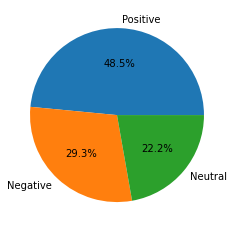

In [47]:
import matplotlib.pyplot as plt
plt.pie([val for val in VADER_SentimentSummary.values()], labels=[cat for cat in VADER_SentimentSummary],
           autopct='%1.1f%%')

# Exporting Sentiment Scores and Category to Excel

In [50]:
from openpyxl import *

file = load_workbook("C:/Users/Sharan/OneDrive - University of Missouri/Teaching/IIM Trichy - International Week/Winter 2021/Sessions/Dec 27 - Session 2/UA_Tweets_Small.xlsx")
sheet = file["Sheet1"]

sheet.cell(1,4).value = "SentimentScore"
sheet.cell(1,5).value = "SentimentCategory"

for row in range(2, 101):
    sheet.cell(row,4).value = VADER_review_sentiment[row-2]
    sheet.cell(row,5).value = VADER_sentiment_category[row-2]
             
file.save("C:/Users/Sharan/OneDrive - University of Missouri/Teaching/IIM Trichy - International Week/Winter 2021/Sessions/Dec 27 - Session 2/UA_Tweets_SmallOutput.xlsx")

# Visualizing Sentiment over Time

                     SentimentScore  Negative  Neutral  Positive
DateTime                                                        
2015-02-24 08:00:00          3.9469         3        4        10
2015-02-24 09:00:00         -0.0788        12        7        10
2015-02-24 10:00:00          6.4532         9        5        18
2015-02-24 11:00:00          1.6979         5        6        10


([<matplotlib.axis.XTick at 0x2300bee7ee0>,
 [Text(0.25, 0, '8AM'),
  Text(1.25, 0, '9AM'),
  Text(2.25, 0, '10AM'),
  Text(3.25, 0, '11AM')])

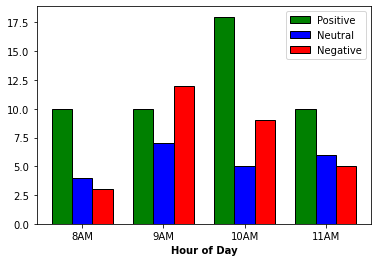

In [51]:
# Import required packages
import pandas as pd
import datetime
import numpy as np

#Extract Output Data
UA_TweetData = pd.ExcelFile('UA_Tweets_SmallOutput.xlsx').parse('Sheet1')


#Get one-hot encoding of SentimentCategory Column
code_SentimentCategory = pd.get_dummies(UA_TweetData.SentimentCategory)

# Drop column as it is now encoded
UA_TweetData = UA_TweetData.drop('SentimentCategory',axis = 1)

# Join the encoded df
UA_TweetData = UA_TweetData.join(code_SentimentCategory)

#Set Datetime as index
UA_TweetData = UA_TweetData.set_index('DateTime')

#Group By Time period (h for hour, d for day, m for months)
Opinion_over_Time = UA_TweetData.resample('h').sum()

print(Opinion_over_Time)
import matplotlib.pyplot as plt

X = np.arange(4)
# Make the plot
plt.bar(X + 0.00, Opinion_over_Time['Positive'], color='g', width=0.25, edgecolor='black', label='Positive')
plt.bar(X + 0.25, Opinion_over_Time['Neutral'], color='b', width=0.25, edgecolor='black', label='Neutral')
plt.bar(X + 0.50, Opinion_over_Time['Negative'], color='r', width=0.25, edgecolor='black', label='Negative')
plt.legend()

plt.xlabel('Hour of Day', fontweight='bold')
plt.xticks([r + 0.25 for r in range(len(Opinion_over_Time['Positive']))], ['8AM', '9AM', '10AM', '11AM'])



<Figure size 432x288 with 0 Axes>

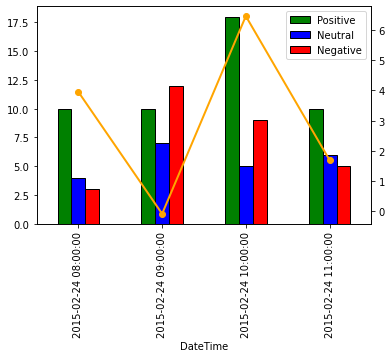

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()
fill_colors = ['g','b','r']
ax = Opinion_over_Time[['Positive','Neutral','Negative']].plot(kind='bar', color = fill_colors, edgecolor = 'black',use_index=True)
ax2 = ax.twinx()
ax2.plot(Opinion_over_Time[['SentimentScore']].values, linestyle='-', marker='o', color = 'orange',linewidth=2.0)